<h1> REVIEW CODE FOR REQUIREMENT DICODING ELITE

In [1]:
# Import dataset using pandas

import pandas as pd

df= pd.read_csv('Corona_NLP.csv',error_bad_lines=False )
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_22180\3018017304.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df= pd.read_csv('Corona_NLP.csv',error_bad_lines=False )


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [2]:
# Drop useless columns
df = df.drop(columns=['UserName','ScreenName','Location','TweetAt'], axis=1)

In [91]:
df.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


kamu bisa melakukan visualisasi data untuk mendapatkan insight dari data yang kamu miliki.

Ketika pada tahap eksplorasi data, kamu menemukan adanya ketidak seimbangan data atau imbalance dataset, kamu bisa menggunakan teknik resampling untuk mengatasi masalah tersebut. Teknik resampling yang bisa kamu gunakan adalah undersampling dan oversampling.

In [92]:
# One Hot Encoding

label_category = pd.get_dummies(df.Sentiment)
new_df = pd.concat([df,label_category],axis=1)
new_df = new_df.drop(columns=['Sentiment'])
new_df.head()

,OriginalTweet,Extremely Negative,Extremely Positive,Negative,Neutral,Positive
0,TRENDING: New Yorkers encounter empty supermar...,1,0,0,0,0
1,When I couldn't find hand sanitizer at Fred Me...,0,0,0,0,1
2,Find out how you can protect yourself and love...,0,1,0,0,0
3,#Panic buying hits #NewYork City as anxious sh...,0,0,1,0,0
4,#toiletpaper #dunnypaper #coronavirus #coronav...,0,0,0,1,0


Coba lakukan tahap preprocessing pada data tersebut, karena seperti yang terlihat pada data tersebut masih mengandung simbol dan huruf kapital.
Tahap preprocessing yang dapat anda lakukan seperti menghilangkan stopword, mengubah ke lowercase dan menghilangkan simbol. Lebih lengkapnya anda dapat melakukan lemmatization atau stemming pada data tersebut. Anda dapat menggunakan library NLTK untuk melakukan preprocessing, sehingga data menjadi lebih powerfull untuk dilakukan training.

In [93]:
# Dataframe to array

dataset = new_df.values

tweet = dataset[:,0]
labels = dataset[:,1:]

# Convert to float32

import numpy as np

labels=np.asarray(labels).astype(np.float32)

In [94]:
# Training and Testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweet,labels,test_size = 0.2 )
y_test

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [95]:
# Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 5000, oov_token='x')
tokenizer.fit_on_texts(X_train) 
tokenizer.fit_on_texts(X_test)


# Sequence

sequence_training = tokenizer.texts_to_sequences(X_train)
sequence_testing = tokenizer.texts_to_sequences(X_test)


# Padding 
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_training = pad_sequences(sequence_training) 
padded_testing = pad_sequences(sequence_testing)

Metode `tokenizer.fit_on_texts` sebaiknya dilakukan pada data training saja, karena data testing tidak boleh diketahui oleh model. Jadi, sebaiknya data testing dijadikan data baru yang tidak pernah dilihat oleh model sebelumnya.

Kamu bisa menambahkan parameter <oov> atau <unk> pada tokenizer.fit_on_texts untuk menangani kata-kata yang tidak ada dalam vocab. Jadi, kata-kata yang tidak ada dalam vocab akan dianggap sebagai <oov> atau <unk>.

Kamu bisa menambahkan parameter pada fungsi `pad_sequence` seperti maxlen, padding, dan truncating pada tokenizer.texts_to_sequences untuk menangani panjang sequence yang berbeda-beda.

In [96]:
# Making NN and Compile
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=6000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [97]:
# Callback  Function

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    accruacy_threshold = 0.98
    if(logs.get('accuracy')>accruacy_threshold):
      print("\n Accuracy Over "+ str(accruacy_threshold)+"% !")
      self.model.stop_training = True
callbacks = myCallback()

kamu juga bisa menambahkan accuracy threshold untuk akurasi validasi sehingga kita mengetahui perbandingan antara akurasi data training dan data testing.
Anda bisa memodifikasi code menjadi seperti berikut ini :

`accuraccy_threshold = 0.98`

`val_accuracy_threshold = 0.98`

`if(logs.get('accuracy') > accuracy_threshold and logs.get('val_accuracy') > val_accuracy_threshold):`

`print("\n Accuracy Over " + str(accuracy_threshold) + " and Validation Accuracy Over " + str(val_accuracy_threshold) + " - Stopping training!!")`

`self.model.stop_training = True`

In [98]:
num_epochs = 100
history = model.fit(padded_training, y_train, batch_size = 128, epochs=num_epochs, 
                    validation_data=(padded_testing, y_test), verbose=2,callbacks=[callbacks])

Epoch 1/100
24/24 - 5s - loss: 1.5939 - accuracy: 0.2449 - val_loss: 1.5666 - val_accuracy: 0.2592
Epoch 2/100
24/24 - 2s - loss: 1.5790 - accuracy: 0.2663 - val_loss: 1.5633 - val_accuracy: 0.2908
Epoch 3/100
24/24 - 2s - loss: 1.5625 - accuracy: 0.2699 - val_loss: 1.5482 - val_accuracy: 0.2908
Epoch 4/100
24/24 - 2s - loss: 1.4954 - accuracy: 0.3018 - val_loss: 1.5293 - val_accuracy: 0.2921
Epoch 5/100
24/24 - 2s - loss: 1.3437 - accuracy: 0.3891 - val_loss: 1.5404 - val_accuracy: 0.3184
Epoch 6/100
24/24 - 2s - loss: 1.1396 - accuracy: 0.5013 - val_loss: 1.6841 - val_accuracy: 0.3355
Epoch 7/100
24/24 - 3s - loss: 0.9363 - accuracy: 0.5997 - val_loss: 1.8058 - val_accuracy: 0.3618
Epoch 8/100
24/24 - 2s - loss: 0.7348 - accuracy: 0.7031 - val_loss: 2.0324 - val_accuracy: 0.3789
Epoch 9/100
24/24 - 2s - loss: 0.5311 - accuracy: 0.7959 - val_loss: 2.4957 - val_accuracy: 0.3987
Epoch 10/100
24/24 - 2s - loss: 0.3594 - accuracy: 0.8736 - val_loss: 2.7519 - val_accuracy: 0.3868
Epoch 11/

Model diatas memiliki performa yang cukup baik dengan mencapai akurasi di atas 98%. Namun, terdapat kecenderungan overfitting pada model karena terlihat perbedaan antara akurasi pada data training dan data validasi.

Anda bisa menambahkan regularisasi, seperti dropout, untuk mengurangi overfitting. Anda dapat menambahkan layer dropout di antara layer yang ada di model Anda.

`tf.keras.layers.Dropout(params)`

Gunakan Early Stopping untuk menghentikan training ketika akurasi pada data validasi tidak terus meningkat. Anda dapat menggabungkan ini dengan ModelCheckpoint untuk menyimpan model terbaik.

`from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint`

`early_stopping = EarlyStopping(monitor='val_loss', patience=3)`
`model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)`
`callbacks = [early_stopping, model_checkpoint]`

Gunakan Callback Lainnya seperti Auto Reduce Learning Rate dan lainnya. 

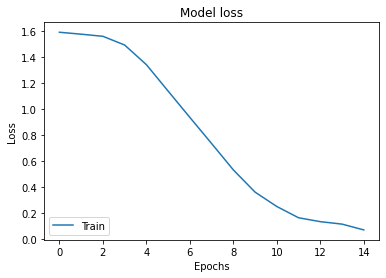

In [99]:
# Plot using matplotlib

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='lower left')
plt.show()

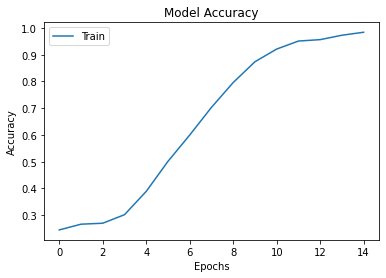

In [100]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train'], loc='upper left')
plt.show()

Ingatlah bahwa mengoptimalkan model deep learning seringkali merupakan proses iteratif dan memerlukan banyak eksperimen untuk menemukan kombinasi terbaik dari teknik dan hyperparameter.

# Summary Projects

- Perlu adanya ekplorasi terhadap data untuk menemukan adanya keganjilan dalam data, seperti data yang tidak seimbang, duplikat data, data yang kosong, dan lainnya. Jika ditemukan suatu keganjilan dalam dataset, alangkah baiknya melakukan penanganan terlebih dahulu sebelum lanjut ke tahap selanjutnya agar model yang akan dibuat memiliki performa yang baik.
- Dalam memproses sebuah data teks kita perlu melakukan tahap preprocessing yang dimana kita perlu melakukan beberapa cara agar teks yang kita dapat bersih dari simbol, emoji, kata tidak baku, dan lainnya. Tahapan-tahapan tersebut dapat dilakukan menggunakan library NLTK ataupun regex.
- Performa model dilihat dari nilai akurasi pada data validasi perlu di evaluasi kembali karena model cenderung overfitting
- Percobaan dengan data yang lebih besar. Data yang digunakan saat ini relatif kecil, hanya memiliki kurang lebih 3800 data. Dapat mencoba dengan data yang lebih besar untuk mengetahui seberapa baik performa model ketika berjalan.